In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!unzip bank+marketing.zip 
!unzip bank.zip

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:
* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [2]:
df = pd.read_csv('data/bank-full.csv', sep=';')

In [3]:
cols = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
        'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [4]:
df = df.loc[:, cols]

In [5]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
df.y.replace({'yes': 1, 'no': 0}, inplace=True)

In [10]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
X.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [14]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)

In [15]:
X_train.shape, X_val.shape, X_test.shape

((27126, 14), (9042, 14), (9043, 14))

In [37]:

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y
y_val = df_val.y
y_test = df_test.y

del df_train['y']
del df_val['y']
del df_test['y']

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `y` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- **`duration`**
- `previous`

In [16]:
from sklearn.metrics import roc_auc_score

In [38]:
auc_result = []

for col in X_val.describe().columns:
    res = roc_auc_score(y_train, X_train[col])

    if res < 0.5:
        res = roc_auc_score(y_train, -X_train[col])
    auc_result.append((col, res))

In [39]:
df_roc_auc = pd.DataFrame(auc_result, columns=['column', 'auc_score'])

In [40]:
df_roc_auc.sort_values(by='auc_score', ascending=False)

,column,auc_score
3,duration,0.814700
6,previous,0.598565
5,pdays,0.590128
1,balance,0.588831
4,campaign,0.571454
2,day,0.525958
0,age,0.512186


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [41]:
dv = DictVectorizer(sparse=False)

In [42]:
train_dict = X_train.to_dict(orient='records')

X_train_dv = dv.fit_transform(train_dict)

In [43]:
val_dict = X_val.to_dict(orient='records')

X_val_dv = dv.transform(val_dict)

In [44]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [45]:
lr.fit(X_train_dv, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [49]:
# y_pred = lr.predict(X_val_dv)
y_pred = lr.predict_proba(X_val_dv)[:, 1]

In [51]:
round(roc_auc_score(y_val, y_pred), 4)

np.float64(0.9004)

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [52]:
def confusion_matrix(y_val, y_pred):
    
    result = []
    thresholds = np.linspace(0, 1, 101)
    
    for threshold in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        pred_positive = (y_pred >= threshold)
        pred_negative = (y_pred < threshold)
        
        tp = (actual_positive & pred_positive).sum() 
        tn = (actual_negative & pred_negative).sum()
        fp = (pred_positive & actual_negative).sum()
        fn = (pred_negative & actual_positive).sum()
        
        result.append((threshold, tp, tn, fp, fn))
        
    return pd.DataFrame(result, columns=['threshold', 'tp', 'tn', 'fp', 'fn'])

In [53]:
df_scores = confusion_matrix(y_val, y_pred)

In [54]:
df_scores[::10]

,threshold,tp,tn,fp,fn
0,0.0,1098,0,7944,0
10,0.1,926,6451,1493,172
20,0.2,712,7251,693,386
30,0.3,566,7537,407,532
40,0.4,462,7672,272,636
50,0.5,373,7752,192,725
60,0.6,290,7807,137,808
70,0.7,225,7843,101,873
80,0.8,148,7877,67,950
90,0.9,76,7917,27,1022


In [55]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

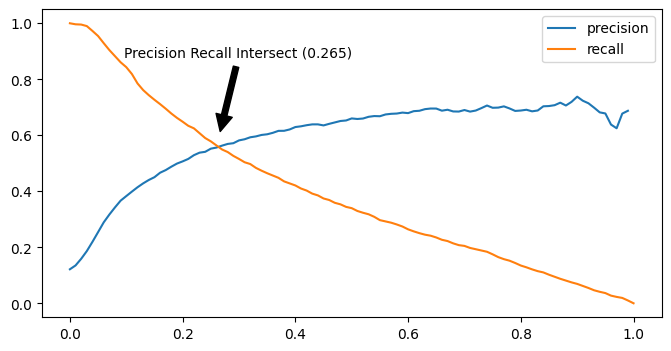

In [60]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_scores.threshold, df_scores.precision, label='precision')
ax.plot(df_scores.threshold, df_scores.recall, label='recall')

ax.annotate('Precision Recall Intersect (0.265)',
            xy=(0.265, 0.6), xycoords='data',
            xytext=(0.5, 0.88), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
plt.legend();

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.